In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load_csv(file, index_col=None):
  return pd.read_csv(file, index_col=index_col)

In [3]:
train_df = load_csv('/content/train_df.csv', index_col='employee_id')
train_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0


In [ ]:
# Notpromoted_df = train_df[train_df.is_promoted == 0]

In [ ]:
# promoted_df = train_df[train_df.is_promoted == 1]

In [4]:
#left for test_df
test_df = load_csv('/content/test_df.csv', index_col='employee_id')
test_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
def basic_stats(df):
  print('\n dataset information:- {}'.format(df.info()))
  print('\n Verify duplicates:- {}'.format(df.duplicated().sum()))
  print('\n Null values in dataframe:- \n{}'.format(df.isnull().sum()))
  print('\n')
  print('numerical statistics:- \n{}'.format(df.describe()))
  print('\n')
  print('Categorical statistics:- \n{}'.format(df.describe(include='O')))
  
  

In [6]:
basic_stats(train_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15294 entries, 65438 to 33826
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            15294 non-null  object 
 1   region                15294 non-null  object 
 2   education             14587 non-null  object 
 3   gender                15293 non-null  object 
 4   recruitment_channel   15293 non-null  object 
 5   no_of_trainings       15293 non-null  float64
 6   age                   15293 non-null  float64
 7   previous_year_rating  14138 non-null  float64
 8   length_of_service     15293 non-null  float64
 9   KPIs_met >80%         15293 non-null  float64
 10  awards_won?           15293 non-null  float64
 11  avg_training_score    15293 non-null  float64
 12  is_promoted           15293 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.6+ MB

 dataset information:- None

 Verify duplicates:- 9

 Null values in 

In [7]:
#test_df
basic_stats(test_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.3+ MB

 dataset information:- None

 Verify duplicates:- 26

 Null values in dataframe:- 
department                 0


In [9]:
train_df['is_promoted'].value_counts(normalize=True)
# only 8% of employees gpt promotion 

0.0    0.914209
1.0    0.085791
Name: is_promoted, dtype: float64

In [11]:
train_df.education.value_counts()

Bachelor's          10183
Master's & above     4188
Below Secondary       215
Bach                    1
Name: education, dtype: int64

In [13]:
train_df.previous_year_rating.median()

3.0

In [ ]:
#IN initial approach, I'll delete all Null values rows.
# #delete duplicate data

# idx = train_df[train_df.duplicated() | train_df['previous_year_rating'].isnull() | train_df['education'].isnull()].index
# idx

In [14]:
train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].median(), inplace=True)
train_df['education'].fillna(train_df['education'].value_counts().index[0], inplace=True)

In [ ]:
#test  We cannt delete null value rows, in test data frame. We need to impute them
test_df.previous_year_rating.median()

3.0

In [15]:
test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].median(), inplace=True)
test_df['education'].fillna(test_df['education'].value_counts().index[0], inplace=True)

In [ ]:
train_df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
print(train_df.shape)
train_df = train_df.drop_duplicates()
print(train_df.shape)

(15294, 13)
(15278, 13)


## EDA

#### Univariate Analysis

In [20]:
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
num_cols

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [21]:
cat_cols = train_df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

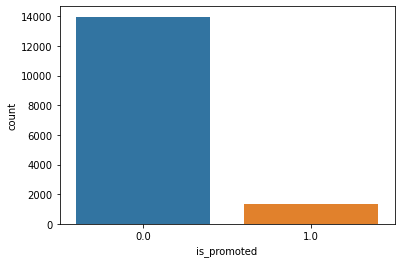

In [17]:
sns.countplot('is_promoted', data=train_df)

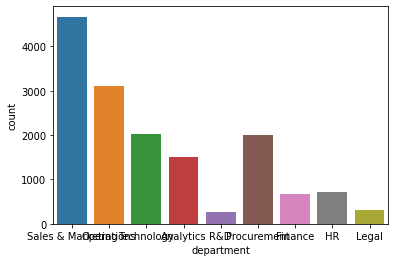

In [22]:
sns.countplot('department', data=train_df)


[Text(0, 0, 'region_7'),
 Text(0, 0, 'region_22'),
 Text(0, 0, 'region_19'),
 Text(0, 0, 'region_23'),
 Text(0, 0, 'region_26'),
 Text(0, 0, 'region_2'),
 Text(0, 0, 'region_20'),
 Text(0, 0, 'region_34'),
 Text(0, 0, 'region_1'),
 Text(0, 0, 'region_4'),
 Text(0, 0, 'region_29'),
 Text(0, 0, 'region_31'),
 Text(0, 0, 'region_15'),
 Text(0, 0, 'region_14'),
 Text(0, 0, 'region_11'),
 Text(0, 0, 'region_5'),
 Text(0, 0, 'region_28'),
 Text(0, 0, 'region_17'),
 Text(0, 0, 'region_13'),
 Text(0, 0, 'region_16'),
 Text(0, 0, 'region_25'),
 Text(0, 0, 'region_10'),
 Text(0, 0, 'region_27'),
 Text(0, 0, 'region_30'),
 Text(0, 0, 'region_12'),
 Text(0, 0, 'region_21'),
 Text(0, 0, 'region_8'),
 Text(0, 0, 'region_32'),
 Text(0, 0, 'region_6'),
 Text(0, 0, 'region_33'),
 Text(0, 0, 'region_24'),
 Text(0, 0, 'region_3'),
 Text(0, 0, 'region_9'),
 Text(0, 0, 'region_18')]

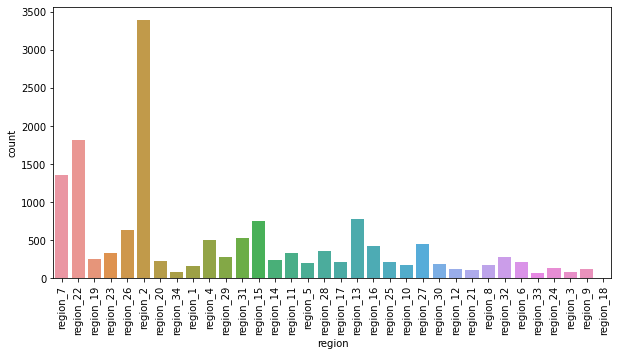

In [29]:
plt.figure(figsize=(10,5))
chart = sns.countplot('region', data=train_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

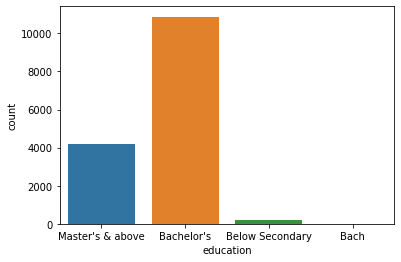

In [30]:
sns.countplot('education', data=train_df)

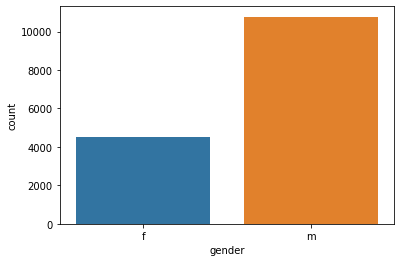

In [31]:
sns.countplot('gender', data=train_df) #recruitment_channel

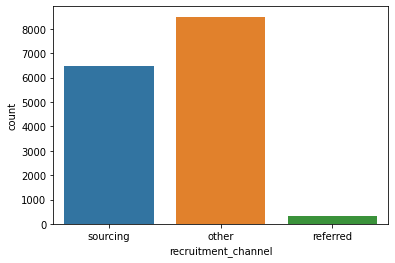

In [32]:
sns.countplot('recruitment_channel', data=train_df)

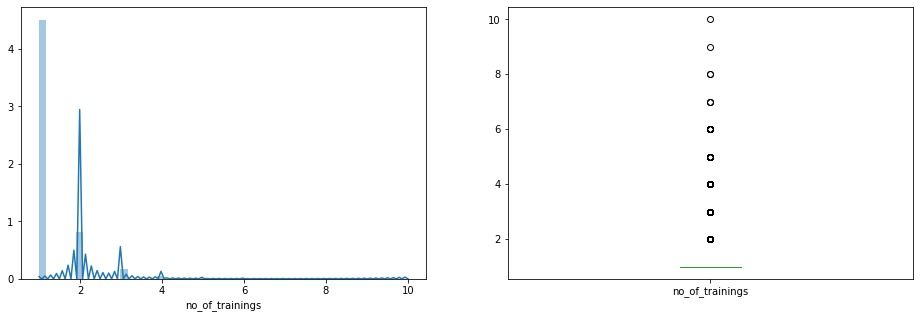

In [39]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['no_of_trainings']);
plt.subplot(122) 
train_df['no_of_trainings'].plot.box(figsize=(16,5)) 
plt.show()

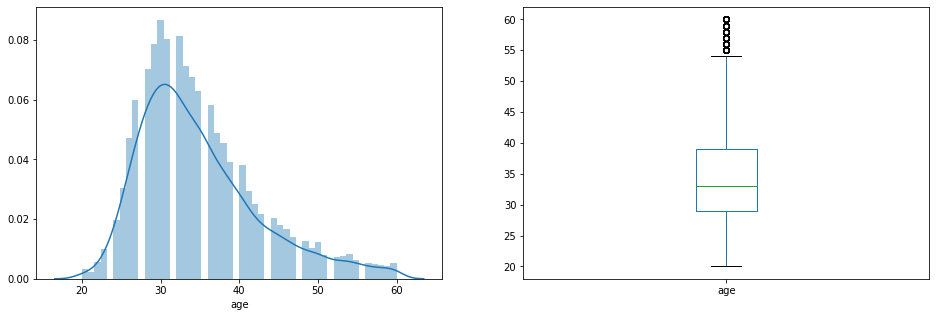

In [40]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['age']);
plt.subplot(122) 
train_df['age'].plot.box(figsize=(16,5)) 
plt.show()

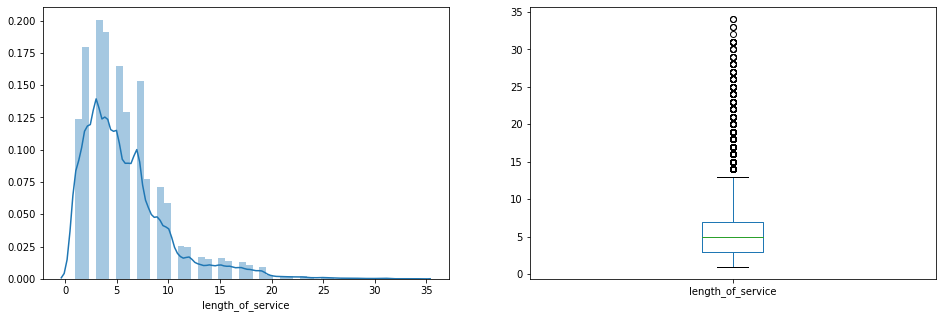

In [42]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['length_of_service']);
plt.subplot(122) 
train_df['length_of_service'].plot.box(figsize=(16,5)) 
plt.show()

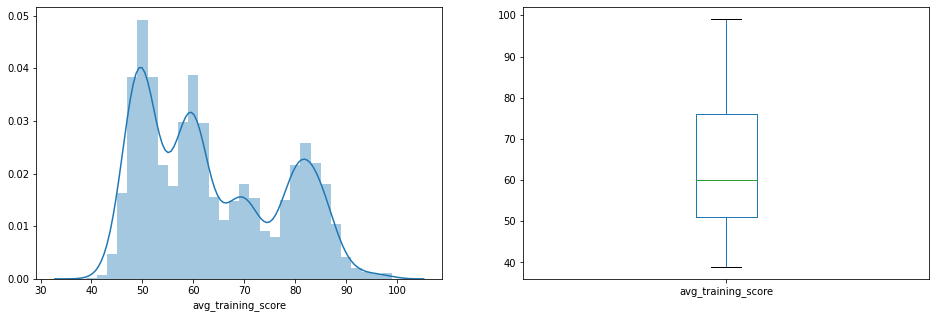

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['avg_training_score']);
plt.subplot(122) 
train_df['avg_training_score'].plot.box(figsize=(16,5)) 
plt.show()

### Bivariate

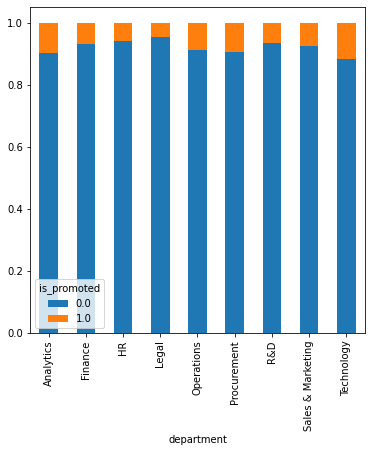

In [47]:
department = pd.crosstab(train_df['department'], train_df['is_promoted'])
department.div(department.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(6,6))

In [50]:
department

is_promoted,0.0,1.0
department,,
Analytics,1364,148
Finance,630,46
HR,664,42
Legal,293,14
Operations,2841,273
Procurement,1807,191
R&D,250,18
Sales & Marketing,4321,345
Technology,1795,235


In [49]:
train_df.groupby('department')['is_promoted'].sum()

department
Analytics            148.0
Finance               46.0
HR                    42.0
Legal                 14.0
Operations           273.0
Procurement          191.0
R&D                   18.0
Sales & Marketing    345.0
Technology           235.0
Name: is_promoted, dtype: float64

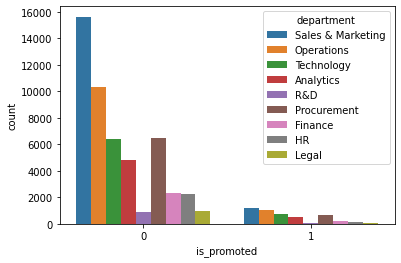

In [ ]:
sns.countplot(x='is_promoted', hue='department' ,data=train_df)

In [ ]:
# sns.countplot(x='is_promoted', hue='region',data=train_df) # region_2 has highest promotion

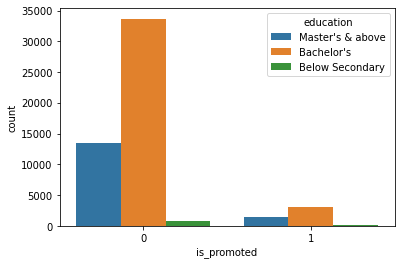

In [ ]:
sns.countplot(x='is_promoted', hue='education',data=train_df)

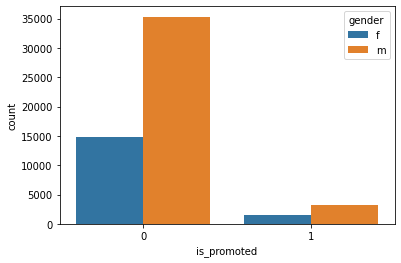

In [ ]:
sns.countplot(x='is_promoted', hue='gender',data=train_df)

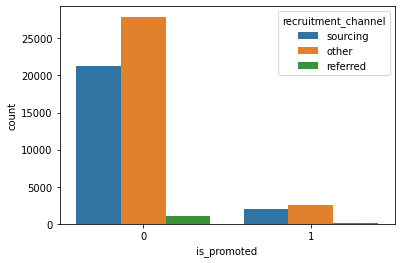

In [ ]:
sns.countplot(x='is_promoted', hue='recruitment_channel',data=train_df)

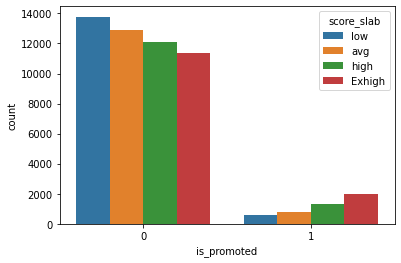

In [ ]:
sns.countplot(x='is_promoted', hue='score_slab',data=train_df)

In [ ]:
train_df.head(1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0


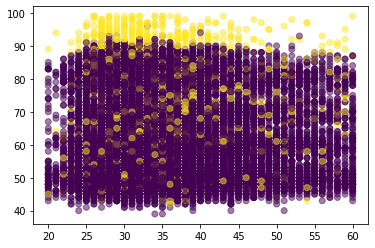

In [ ]:
plt.scatter(x='age', y='avg_training_score', c='is_promoted', data=train_df, alpha=0.5)

## Feature Generation

In [ ]:
train_df.avg_training_score.describe()

count    54647.000000
mean        63.402584
std         13.372815
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [ ]:
pd.qcut(train_df.avg_training_score, q=[0.2, 0.4, 0.6, 0.9, 1])

employee_id
65438               NaN
65141      (58.0, 64.0]
7513     (49.999, 58.0]
2542     (49.999, 58.0]
48945      (64.0, 83.0]
              ...      
13894      (64.0, 83.0]
31921    (49.999, 58.0]
69703      (64.0, 83.0]
39524               NaN
70200               NaN
Name: avg_training_score, Length: 30596, dtype: category
Categories (4, interval[float64]): [(49.999, 58.0] < (58.0, 64.0] < (64.0, 83.0] < (83.0, 99.0]]

In [ ]:
labels = ['low', 'avg', 'high', 'Exhigh']
train_df['score_slab'] = pd.qcut(train_df.avg_training_score, q=4, labels=labels)
test_df['score_slab'] = pd.qcut(test_df.avg_training_score, q=4, labels=labels)

In [ ]:
train_df[['score_slab', 'avg_training_score']].tail()

,score_slab,avg_training_score
employee_id,,
3030,0,78
74592,1,56
13918,0,79
13614,3,45
51526,3,49


In [ ]:
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_df.select_dtypes(exclude=np.number).columns.tolist()
print('Numeric Columns:- {}'.format(num_cols))
print('Categorical Columns:- {}'.format(cat_cols))

Numeric Columns:- ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
Categorical Columns:- ['department', 'region', 'education', 'gender', 'recruitment_channel', 'score_slab']


In [ ]:
#test

In [ ]:
# Label Encoder
def label_encoder(df, cols):
  for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
  return df

In [ ]:
cols = cat_cols
train_df = label_encoder(train_df, cols)

In [ ]:
train_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_slab
employee_id,,,,,,,,,,,,,,
65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3
65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,1
7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3
2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3
48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,2


In [ ]:
#test
cols = cat_cols
test_df = label_encoder(test_df, cols)
test_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,score_slab
employee_id,,,,,,,,,,,,,
8724,8,18,0,1,2,1,24,3.0,1,1,0,77,0
74430,2,28,0,0,0,1,31,3.0,5,0,0,51,3
72255,7,4,0,1,0,1,31,1.0,4,0,0,47,3
38562,5,11,0,0,0,3,31,2.0,9,0,0,65,2
64486,1,21,0,1,2,1,30,4.0,7,0,0,61,2


In [ ]:
# 
feature_df = train_df.drop(['is_promoted'], axis=1)
target_df = train_df['is_promoted']

In [ ]:
feature_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
65438,7,31,2,0,2,1,35,5.0,8,1,0,49
65141,4,14,0,1,0,1,30,5.0,4,0,0,60
7513,7,10,0,1,2,1,34,3.0,7,0,0,50
2542,7,15,0,1,0,2,39,1.0,10,0,0,50
48945,8,18,0,1,0,1,45,3.0,2,0,0,73


In [ ]:
#shuffle dataframe before splitting
feature_df, target_df = shuffle(feature_df, target_df)

In [ ]:
#split dataframe into train and validation sets
train_feature_df, val_feature_df, train_target_df, val_target_df = \
train_test_split(feature_df, target_df, test_size=0.3, stratify=target_df, \
                 random_state=42)

In [ ]:
print('shape of Train Feature Dataframe:- {}'.format(train_feature_df.shape))
print('shape of Train target Dataframe:- {}'.format(train_target_df.shape))
print('shape of Validation Feature Dataframe:- {}'.format(val_feature_df.shape))
print('shape of Validation target Dataframe:- {}'.format(val_target_df.shape))

shape of Train Feature Dataframe:- (38252, 13)
shape of Train target Dataframe:- (38252,)
shape of Validation Feature Dataframe:- (16395, 13)
shape of Validation target Dataframe:- (16395,)


In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(train_feature_df)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = train_feature_df.loc[mask, :], train_target_df.loc[mask]
print(X_train.shape, y_train.shape)

(34426, 13) (34426,)


In [ ]:
train_feature_df = X_train
train_target_df = y_train

In [ ]:
#Evaluate a model
def evaluate_model( model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  metric = make_scorer(f1_score)
  scores = cross_val_score(model, X, y, cv=cv, scoring=metric, n_jobs=-1)
  return scores 
  

In [ ]:
models = []
models.append(('dummy', DummyClassifier(strategy='constant', constant=1)))
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)))
models.append(('SVM',LinearSVC(class_weight='balanced', random_state=42)))
models.append(('knn',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier(random_state=42)))
models.append(('rfc',RandomForestClassifier(class_weight='balanced', random_state=42)))
models.append(('gbc',GradientBoostingClassifier(random_state=42)))


In [ ]:
base_results = []
names = []
for name, model in models:
  cv_result = evaluate_model(model, train_feature_df, train_target_df)
  base_results.append(base_results)
  names.append(name)
  print('%s:- %3f (%3f)' %(name, np.mean(cv_result), np.std(cv_result)))


dummy:- 0.139336 (0.000190)
Logistic Regression:- 0.279802 (0.009472)
SVM:- 0.016853 (0.050102)
knn:- 0.188637 (0.028598)
CART:- 0.378832 (0.025083)
rfc:- 0.361450 (0.036896)
gbc:- 0.372339 (0.044807)


In [ ]:
# Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Comparison of algorithms')
# ax = fig.add_subplot(111)
# plt.boxplot(base_results)
# ax.set_xticklabels(names, rotation=60)
# plt.show()

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(train_feature_df, train_target_df)
f1_score(val_target_df, gbc.predict(val_feature_df))

0.4408251900108578

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
rfc.fit(train_feature_df, train_target_df)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
f1_score(val_target_df, rfc.predict(val_feature_df))

0.42162162162162165

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(feature_df)
# select all rows that are not outliers
mask = yhat != -1
feature_df, target_df = feature_df.loc[mask, :], target_df.loc[mask]
print(feature_df.shape, target_df.shape)

(49182, 13) (49182,)


In [ ]:
#fit on entire training data
rfc.fit(feature_df, target_df)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# predict on test data. 
def results_predict(model, test_data):
  submission = load_csv('/content/sample_submission.csv', index_col='employee_id')
  submission['is_promoted'] = model.predict(test_data)
  print(submission['is_promoted'].value_counts())
  submission.to_csv('/content/rfc_submission.csv')


In [ ]:
results_predict(gbc, test_df) # 0.430528375733855

0    22917
1      573
Name: is_promoted, dtype: int64


In [ ]:
results_predict(gbc, test_df) # baseline result 0.4254901961 - 1835

0    22925
1      565
Name: is_promoted, dtype: int64


In [ ]:
results_predict(rfc, test_df) # 0.4417744917 - 1673

0    22781
1      709
Name: is_promoted, dtype: int64


In [ ]:
results_predict(rfc, test_df) # 0.3930635 - lowest

0    22889
1      601
Name: is_promoted, dtype: int64


In [ ]:
cols = feature_df.columns
cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'score_slab'],
      dtype='object')

In [ ]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index=cols, columns=['feature_importance']).sort_values('feature_importance',ascending=False)

In [ ]:
feature_importance

,feature_importance
avg_training_score,0.255499
age,0.143209
region,0.126681
length_of_service,0.108565
department,0.102316
previous_year_rating,0.056587
KPIs_met >80%,0.047082
recruitment_channel,0.031713
awards_won?,0.031529
score_slab,0.030268
